In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from calculator import Methods,Calculator
from scipy import optimize

In [2]:
cal=Calculator()
cal.read_excel('Data2.xlsx')
order=3 #M_p=5.25327
L_s=cal.L_init[order]
ST=cal.ST[order]*7/10
cal.me.con.set_M_p(cal.M_p[order],8e+2)

In [5]:
cal.me.cal_ML_simple_B(ST,L_s,0.0,-1e-11)
c_P,c_T,c_M=cal.me.con.c_P,cal.me.con.c_T,cal.me.con.c_M
r,P,T,M,L=cal.me.r,cal.me.P,cal.me.T,cal.me.M,cal.me.L
G=cal.me.g
dG=cal.me.dg
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**2*T[i]**(-3)/M[i],cal.me.con.g_ad)*(T[i]*dP[i]/P[i])
dsigma=(-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT

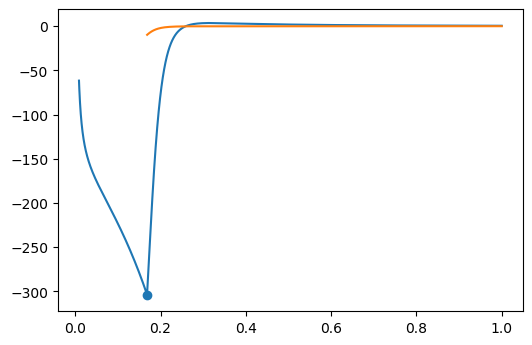

In [6]:
fig=plt.figure(dpi=100)
rcb=cal.me.RCB_index
plt.plot(r,dsigma)
plt.plot(r[0:rcb],dT[0:rcb])
plt.scatter(r[rcb],dsigma[rcb],marker='o')
plt.show()

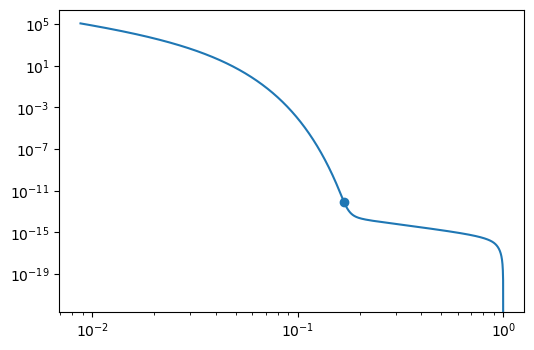

In [12]:
fig=plt.figure(dpi=100)
plt.loglog(r,abs(G)/r/cal.me.con.R_B)
plt.scatter(r[rcb],abs(G)[rcb]/r[rcb]/cal.me.con.R_B)
plt.show()

In [16]:
cal.me.cal_ML_simple_B(ST,L_s,True,0.0,1e-11*(-1))
rcb2=cal.me.RCB_index
c_P,c_T,c_M=cal.me.con.c_P,cal.me.con.c_T,cal.me.con.c_M
r,P,T,M,L,G,dG=cal.me.r,cal.me.P,cal.me.T,cal.me.M,cal.me.L,cal.me.g,cal.me.dg
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**(2)*T[i]**(-3)/M[i],cal.me.con.g_ad)*(T[i]*dP[i]/P[i])
dM=c_M*r**2*P/T
ddG=6*G/r**2+((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT)*dG-(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B

In [6]:
print(((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT)[0])

0.37686887752277526


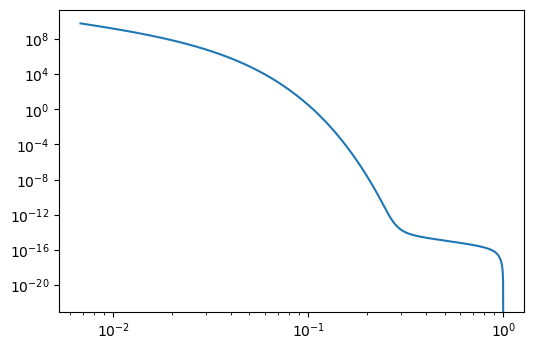

In [24]:
g=cal.me.g
fig=plt.figure(dpi=100)
plt.loglog(r,abs(g)/r/cal.me.con.R_B)
#plt.loglog(r,ddG,'r--')
plt.show()

[]

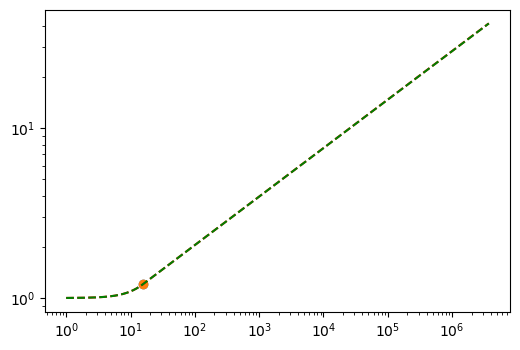

In [21]:
fig=plt.figure(dpi=100)
plt.loglog(p,t,'r--')
plt.scatter(p[rcb1],t[rcb1])
plt.loglog(P,T,'g--')
plt.scatter(P[rcb2],T[rcb2])
plt.plot()

In [22]:
print(rcb1,rcb2)

3736 3736


In [5]:
test_M_v=(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B
test_sigma=((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2)*dT)

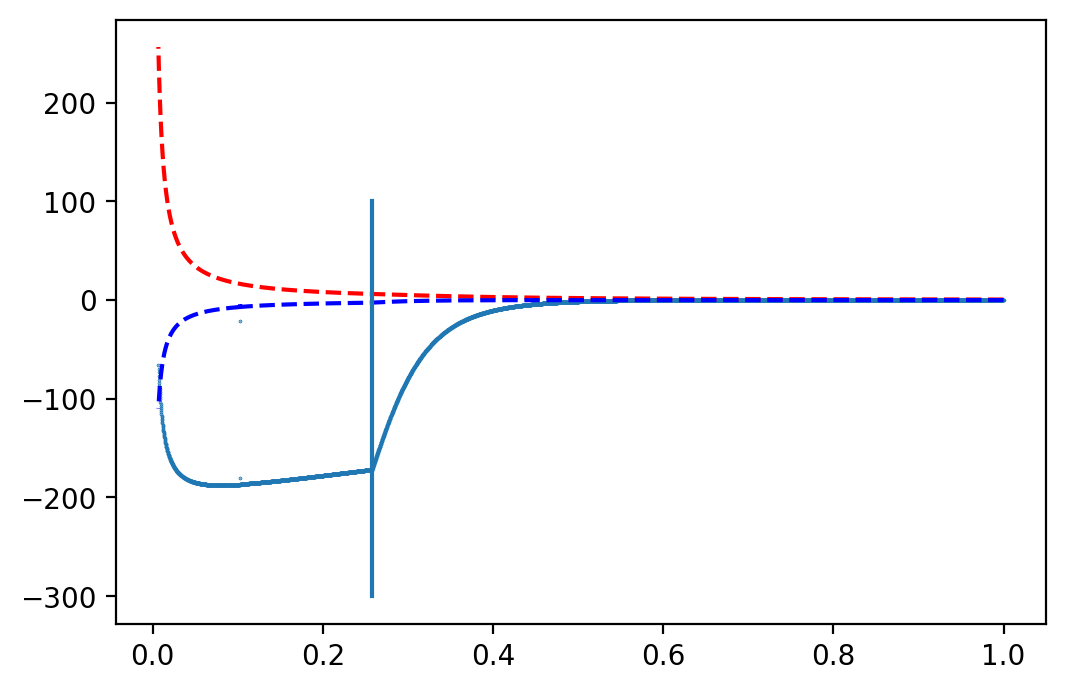

In [14]:
fig=plt.figure(dpi=200)
plt.scatter(r,test_sigma,marker='o',s=0.1)
#plt.plot(r,(cal.me.con.sigma_2/T**2)*dT,'g--')
plt.plot(r,-0.5*dP/P,'r--')
plt.plot(r,0.75/T*dT,'b--')
plt.plot(r[rcb2]*np.ones(300),np.linspace(-300,100,300))
plt.show()

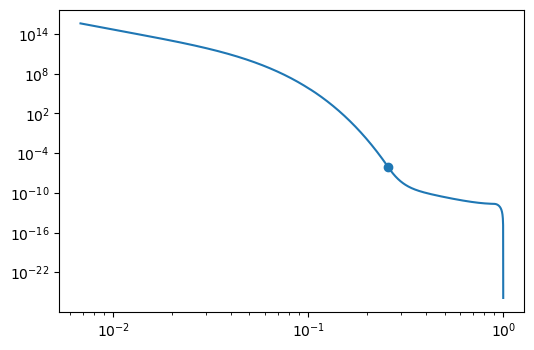

In [26]:
fig=plt.figure(dpi=100)
#plt.plot(r,test_sigma)
dL=7.15e-5*(dG**2+G**2/r**2)/(cal.me.sigma(P,T)*cal.me.con.R_B)
plt.loglog(r,dL)
plt.scatter(r[cal.me.RCB_index],dL[cal.me.RCB_index],marker='o')
plt.show()

In [23]:
P[-1]*cal.me.con.P_0/1e6

850.5857288111711

In [10]:
dG

array([-1.00000000e-11,  1.02494721e+00,  2.03956113e+00,  3.04378921e+00,
        4.03757851e+00,  5.02087567e+00,  5.99362689e+00,  6.95577796e+00,
        7.90727424e+00,  8.84806067e+00,  9.77808173e+00,  1.06972815e+01,
        1.16056035e+01,  1.25029910e+01,  1.33893867e+01,  1.42647327e+01,
        1.51289710e+01,  1.59820428e+01,  1.68238891e+01,  1.76544501e+01,
        1.84736657e+01,  1.92814756e+01,  2.00778185e+01,  2.08626329e+01,
        2.16358568e+01,  2.23974277e+01,  2.31472825e+01,  2.38853577e+01,
        2.46115892e+01,  2.53259124e+01,  2.60282622e+01,  2.67185731e+01,
        2.73967788e+01,  2.80628127e+01,  2.87166076e+01,  2.93580956e+01,
        2.99872084e+01,  3.06038772e+01,  3.12080325e+01,  3.17996043e+01,
        3.23785221e+01,  3.29447146e+01,  3.34981101e+01,  3.40386364e+01,
        3.45662204e+01,  3.50807887e+01,  3.55822672e+01,  3.60705811e+01,
        3.65456552e+01,  3.70074133e+01,  3.74557791e+01,  3.78906751e+01,
        3.83120236e+01,  